### Step 0: Loading the libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sn

#Using Imputer with a strategy = most_frequent

import sklearn

#import sklearn.impute

from sklearn.impute import SimpleImputer

# from sklearn.preprocessing import Imputer

import statistics

from statistics import mean, median, mode, stdev


### Step 1: Loading Datasets

In [8]:
df_2019 = pd.read_csv("../data/Road Safety Data - Casualties 2019.csv")
df_2018 = pd.read_csv("../data/Road Safety Data - Casualties 2018.csv")
df_2017 = pd.read_csv("../data/Road Safety Data - Casualties 2017.csv")

/Users/devarakondasantosh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Part A: Data Preprocessing

In [124]:
# Verifying all datasets if they're looking alike

df_2019.describe()

df_2019.info()

df_2019.head()

df_2019.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [125]:
df_2018.describe()

df_2018.info()

df_2018.head()

df_2018.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160597 entries, 0 to 160596
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      160597 non-null  object
 1   Vehicle_Reference                   160597 non-null  int64 
 2   Casualty_Reference                  160597 non-null  int64 
 3   Casualty_Class                      160597 non-null  int64 
 4   Sex_of_Casualty                     160597 non-null  int64 
 5   Age_of_Casualty                     160597 non-null  int64 
 6   Age_Band_of_Casualty                160597 non-null  int64 
 7   Casualty_Severity                   160597 non-null  int64 
 8   Pedestrian_Location                 160597 non-null  int64 
 9   Pedestrian_Movement                 160597 non-null  int64 
 10  Car_Passenger                       160597 non-null  int64 
 11  Bus_or_Coach_Passenger              160

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [126]:
df_2017.describe()

df_2017.info()

df_2017.head()

df_2017.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      170993 non-null  object
 1   Vehicle_Reference                   170993 non-null  int64 
 2   Casualty_Reference                  170993 non-null  int64 
 3   Casualty_Class                      170993 non-null  int64 
 4   Sex_of_Casualty                     170993 non-null  int64 
 5   Age_of_Casualty                     170993 non-null  int64 
 6   Age_Band_of_Casualty                170993 non-null  int64 
 7   Casualty_Severity                   170993 non-null  int64 
 8   Pedestrian_Location                 170993 non-null  int64 
 9   Pedestrian_Movement                 170993 non-null  int64 
 10  Car_Passenger                       170993 non-null  int64 
 11  Bus_or_Coach_Passenger              170

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

# Merging datasets into one big dataset

In [9]:
df = df_2019.append(df_2018).append(df_2017)

In [10]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


# Step 3: Visualizations

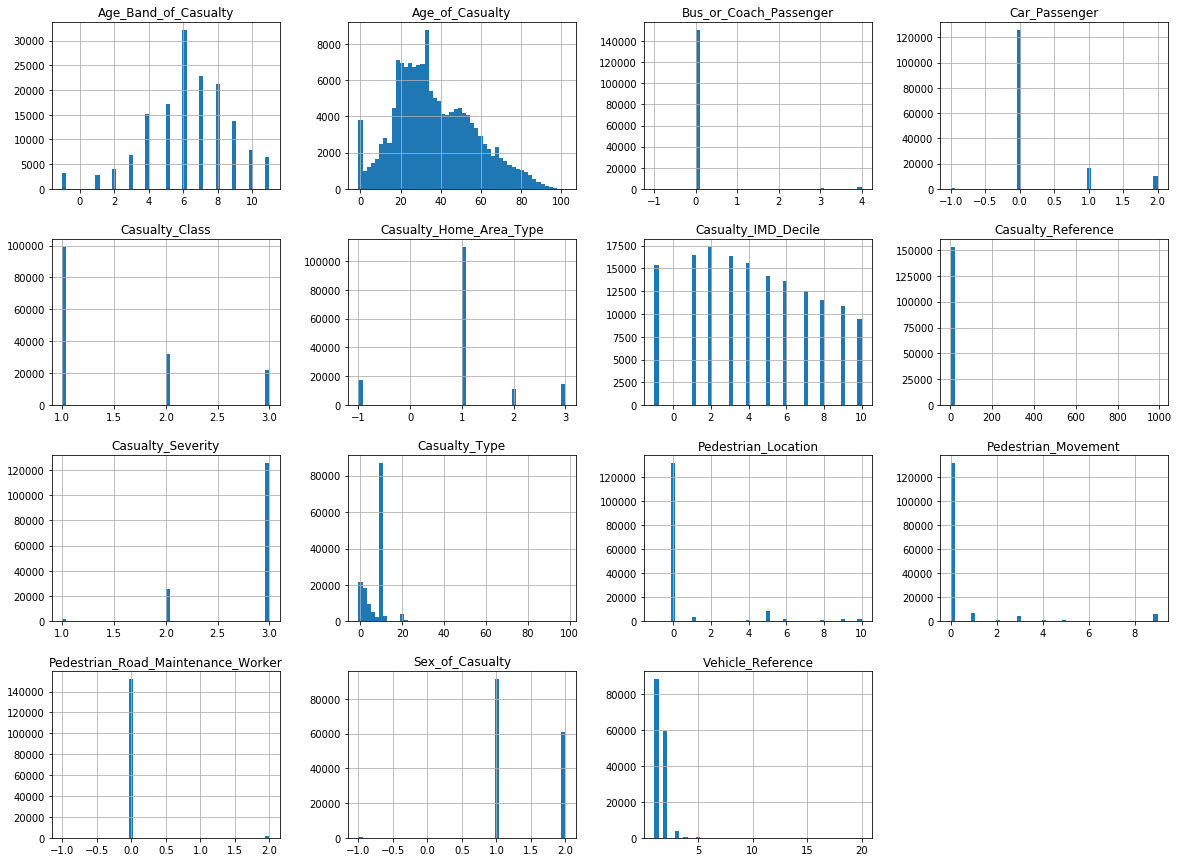

In [31]:
#Histogram

%matplotlib inline   

df_2019.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123d8ee90>,
      dtype=object)

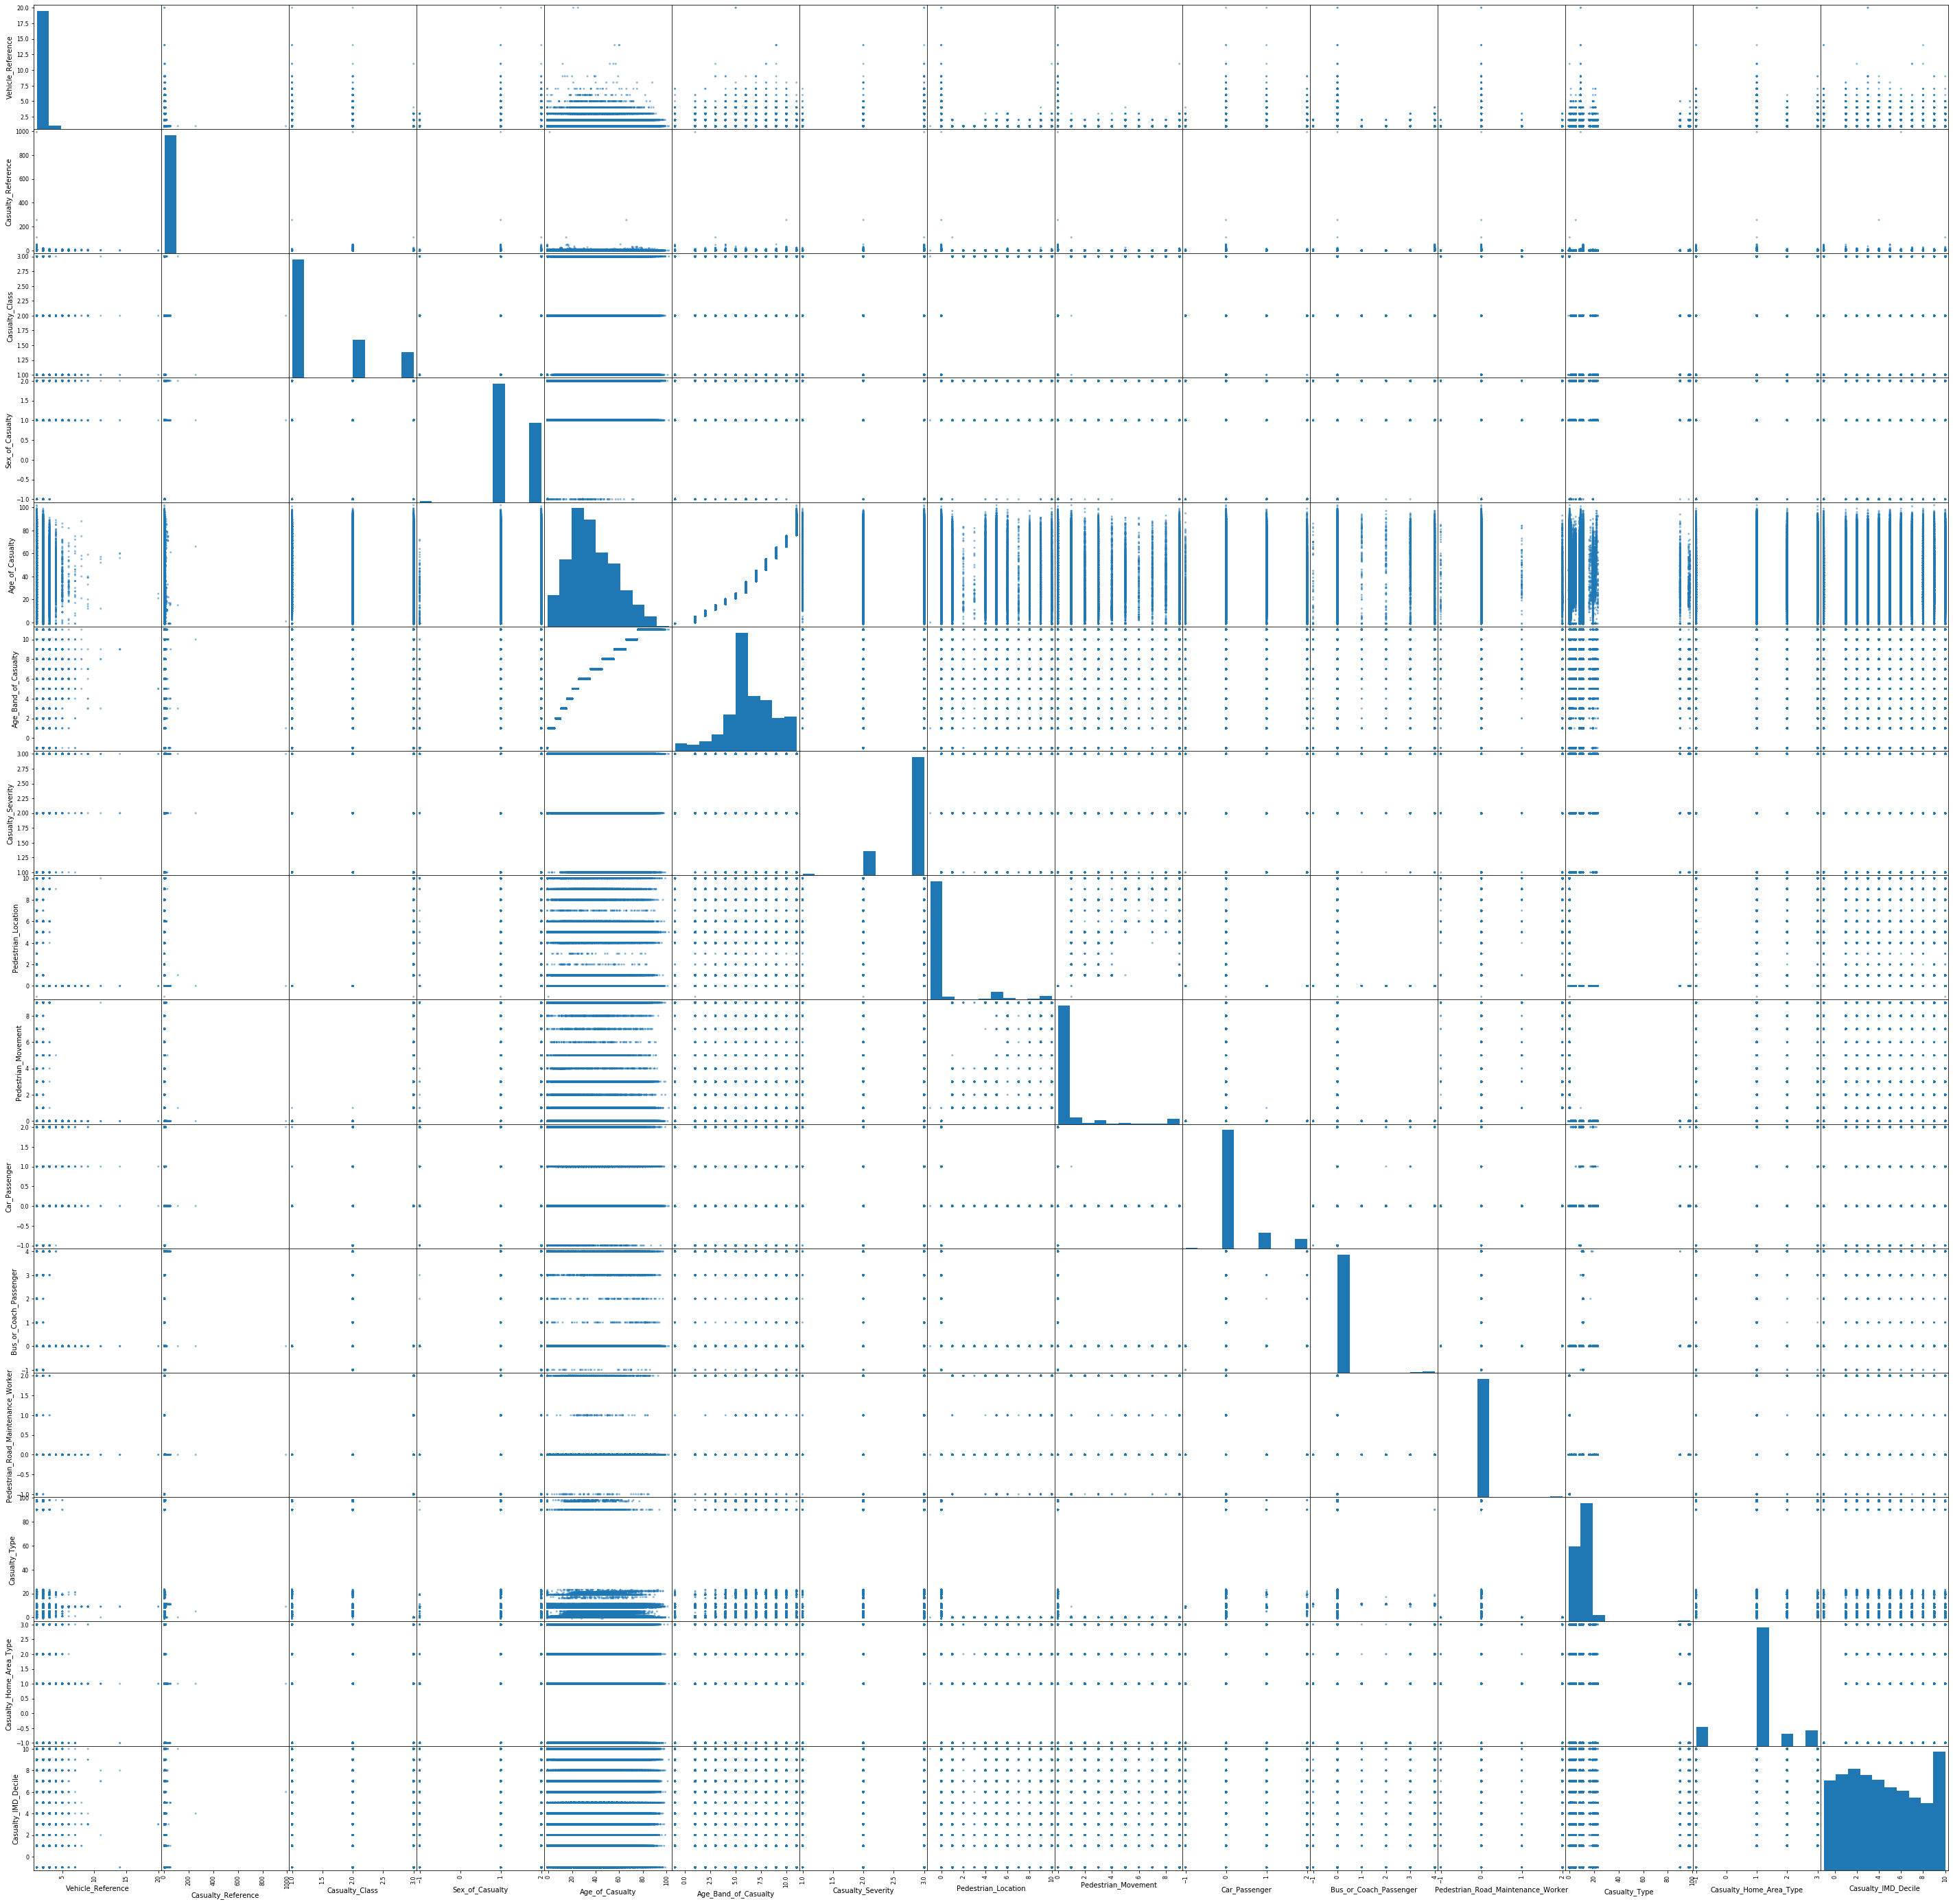

In [32]:
# Scatter Matrix

%matplotlib inline
scatter_matrix(df_2019, figsize=(50,50))

In [33]:
# Correlation Matrix

corrMatrix = df_2019.corr()
print (corrMatrix)

                                    Vehicle_Reference  Casualty_Reference  \
Vehicle_Reference                            1.000000            0.067877   
Casualty_Reference                           0.067877            1.000000   
Casualty_Class                              -0.258599            0.047472   
Sex_of_Casualty                              0.025018            0.016832   
Age_of_Casualty                              0.040903           -0.032687   
Age_Band_of_Casualty                         0.052084           -0.042025   
Casualty_Severity                            0.081866            0.014502   
Pedestrian_Location                         -0.255809           -0.037193   
Pedestrian_Movement                         -0.220934           -0.029688   
Car_Passenger                                0.051404            0.142201   
Bus_or_Coach_Passenger                      -0.033511            0.066342   
Pedestrian_Road_Maintenance_Worker          -0.064693           -0.010446   

In [35]:
# corrMatrix["Class"].sort_values(ascending=False)

cor_target1 = abs(corrMatrix["Casualty_Severity"])
cor_target1.sort_values(ascending=False)

Casualty_Severity                     1.000000
Pedestrian_Location                   0.100796
Age_of_Casualty                       0.091342
Age_Band_of_Casualty                  0.084417
Vehicle_Reference                     0.081866
Pedestrian_Movement                   0.078114
Casualty_Class                        0.073039
Sex_of_Casualty                       0.070190
Casualty_Type                         0.059388
Car_Passenger                         0.054612
Bus_or_Coach_Passenger                0.027139
Pedestrian_Road_Maintenance_Worker    0.019232
Casualty_Home_Area_Type               0.015834
Casualty_Reference                    0.014502
Casualty_IMD_Decile                   0.006082
Name: Casualty_Severity, dtype: float64

In [ ]:
#My observations here:

# 1. I didn't see any feature being very strongly correlated, i.e., all are below 0.1
# 2. The only highest correlation I could see is in Pedestrian location. 
# 3. And majority of Pedestrian location in the dataset is 

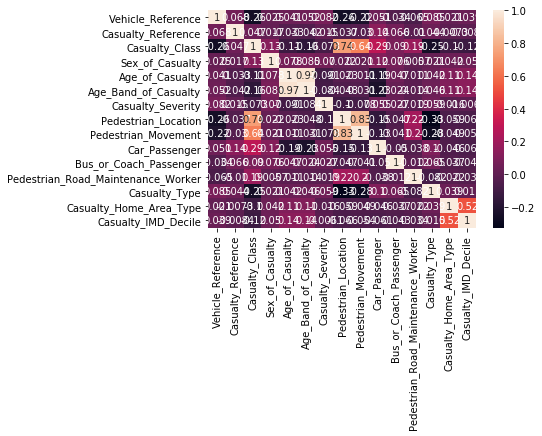

<Figure size 3600x3600 with 0 Axes>

In [34]:
# HeatMap Of Correlation Matrix

sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize = (50,50))
plt.show()

## 1. B: Data clean up: 2019 data

In [129]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484748 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      484748 non-null  object
 1   Vehicle_Reference                   484748 non-null  int64 
 2   Casualty_Reference                  484748 non-null  int64 
 3   Casualty_Class                      484748 non-null  int64 
 4   Sex_of_Casualty                     484748 non-null  int64 
 5   Age_of_Casualty                     484748 non-null  int64 
 6   Age_Band_of_Casualty                484748 non-null  int64 
 7   Casualty_Severity                   484748 non-null  int64 
 8   Pedestrian_Location                 484748 non-null  int64 
 9   Pedestrian_Movement                 484748 non-null  int64 
 10  Car_Passenger                       484748 non-null  int64 
 11  Bus_or_Coach_Passenger              484

In [131]:
df[df['Sex_of_Casualty']<0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
383,2019010156414,1,2,2,-1,4,1,3,0,0,2,0,0,9,1,3
1742,2019010159930,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,1
3745,2019010164961,1,3,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3746,2019010164961,1,4,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3747,2019010164961,1,5,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135825,2017460254631,2,1,1,-1,41,7,3,0,0,0,0,0,9,1,3
135908,2017460256339,1,1,1,-1,30,6,3,0,0,0,0,0,1,-1,-1
144551,2017500218861,4,3,1,-1,-1,-1,3,0,0,0,0,0,1,-1,-1
145931,2017500246243,2,2,1,-1,21,5,3,0,0,0,0,0,3,-1,-1


Only 800 out of 484748 rows are dirty data w.r.t sex of casulaity, not even 1% of the total data. So we can safely drop these rows. Other options of handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value. 

Here, the first option of removing the rows make more sense. So, we will drop this dirty records.

In [11]:
df.drop(df[df['Sex_of_Casualty'] < 0].index, inplace=True)

In [12]:
df[df['Sex_of_Casualty']<0] #Good data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [13]:
df[df['Casualty_Class'] < 0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


No dirty data w.r.t Casualty_Class. so, no need to do anything here.

In [14]:
df[df['Age_of_Casualty'] < 0] #Dirty Data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
46,2019010155303,1,2,2,2,-1,-1,3,0,0,2,0,0,9,1,2
47,2019010155303,1,3,2,1,-1,-1,3,0,0,2,0,0,9,1,2
120,2019010155611,1,1,2,2,-1,-1,3,0,0,2,0,0,9,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167355,201797GK01401,2,1,1,1,-1,-1,3,0,0,0,0,0,19,-1,-1
167697,201797GP01304,1,1,1,1,-1,-1,3,0,0,0,0,0,5,-1,-1
169269,201797ND00506,2,1,1,2,-1,-1,2,0,0,0,0,0,1,-1,-1
169422,201797NE01403,2,1,1,1,-1,-1,3,0,0,0,0,0,1,1,-1


Only 7704 out of 484748 rows are dirty data w.r.t age of casulaity, which is 0.0158% of the data, not even 1% of the total data. 

So we can safely drop these rows. Other options of handling dirty data are: 2) To remove the attribute and 3) Impute with a guess (suitable) value.

Here, the first option of removing the rows make more sense. So, we will drop this dirty records.

In [15]:
df.drop(df[df['Age_of_Casualty'] < 0].index, inplace=True)

In [16]:
df[df['Age_of_Casualty']>120] #Looks valid data only

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [17]:
df['Age_Band_of_Casualty'].unique()

array([ 9,  5, 10,  8,  4,  7,  6,  3,  1, 11,  2])

In [18]:
df[df['Age_Band_of_Casualty'] < 0] #Looks good only

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [19]:
df['Casualty_Severity'].unique() #Looks good only

array([3, 2, 1])

In [20]:
df[df['Casualty_Severity']>3]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [21]:
df[df['Casualty_Severity']<1]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [22]:
df[df['Pedestrian_Location']<0] #Dirty data - 5 records. We will just remove these

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
146604,2019921900298,1,1,3,1,0,1,2,-1,1,0,0,0,0,1,10
139847,2018521802167,1,1,3,2,50,8,3,-1,9,0,0,0,0,-1,-1
139947,2018521802684,1,1,3,2,25,5,3,-1,9,0,0,0,0,1,8
140302,2018521803925,1,1,3,2,40,7,3,-1,9,0,0,0,0,1,7
141708,2018521901393,1,1,3,1,71,10,3,-1,9,0,0,0,0,1,10


In [23]:
df.drop(df[df['Pedestrian_Location'] < 0].index, inplace=True)

In [24]:
df[df['Pedestrian_Location']>10] #Looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [25]:
df[df['Pedestrian_Movement']<0] #No dirty data - looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [26]:
df[df['Pedestrian_Movement']>0]['Pedestrian_Movement'].unique() #data in range - looks good

array([4, 3, 1, 9, 2, 5, 7, 8, 6])

For Pedestrian_Movement, 0-9 are the valid data values. -1 is dirty data

In [27]:
df[df['Car_Passenger']<0] #No dirty data - looks good

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
731,2019010157383,1,2,2,2,53,8,3,0,0,-1,0,0,9,1,3
743,2019010157412,1,1,2,2,53,8,3,0,0,-1,0,0,9,1,2
823,2019010157686,1,1,2,2,18,4,3,0,0,-1,0,0,9,1,5
871,2019010157798,1,2,2,2,18,4,3,0,0,-1,0,0,9,-1,-1
1002,2019010158143,1,1,2,2,8,2,3,0,0,-1,0,0,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135970,2017460256972,1,2,2,2,24,5,3,0,0,-1,0,0,9,2,10
135990,2017460257653,1,1,2,1,69,10,3,0,0,-1,0,0,9,1,7
142777,2017500176043,1,1,2,1,29,6,3,0,0,-1,0,0,9,1,2
150399,2017530166354,1,1,2,2,19,4,3,0,0,-1,0,0,9,1,1


Valid range of Car_Passenger is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [28]:
df[df['Car_Passenger']<0] #No dirty data - looks good


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
731,2019010157383,1,2,2,2,53,8,3,0,0,-1,0,0,9,1,3
743,2019010157412,1,1,2,2,53,8,3,0,0,-1,0,0,9,1,2
823,2019010157686,1,1,2,2,18,4,3,0,0,-1,0,0,9,1,5
871,2019010157798,1,2,2,2,18,4,3,0,0,-1,0,0,9,-1,-1
1002,2019010158143,1,1,2,2,8,2,3,0,0,-1,0,0,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135970,2017460256972,1,2,2,2,24,5,3,0,0,-1,0,0,9,2,10
135990,2017460257653,1,1,2,1,69,10,3,0,0,-1,0,0,9,1,7
142777,2017500176043,1,1,2,1,29,6,3,0,0,-1,0,0,9,1,2
150399,2017530166354,1,1,2,2,19,4,3,0,0,-1,0,0,9,1,1


In [29]:
 df[df['Car_Passenger']>=0]['Car_Passenger'].unique() #data in range - looks good

array([0, 1, 2])

In [30]:
 df.drop(df[df['Age_of_Casualty'] < 0].index, inplace=True)


In [31]:
 df['Bus_or_Coach_Passenger'].unique() #Has dirty data = -1. now, we want to find how much dirty data is existing.


array([ 0,  4,  3,  1,  2, -1])

In [32]:
 df[df['Bus_or_Coach_Passenger']<0] #dirty data - 98/484748


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
3401,2019010164122,1,1,2,2,39,7,2,0,0,0,-1,0,11,1,2
4047,2019010165668,1,1,2,2,45,7,2,0,0,0,-1,0,11,1,2
11077,2019010183620,1,1,2,2,3,1,3,0,0,0,-1,0,11,-1,-1
16464,2019010196755,1,1,2,2,15,3,3,0,0,0,-1,0,11,-1,-1
21679,2019010208809,1,2,2,1,59,9,2,0,0,0,-1,0,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134481,2017460231867,1,1,2,2,11,3,3,0,0,0,-1,0,11,-1,-1
135260,2017460244985,1,1,2,2,60,9,3,0,0,0,-1,0,11,1,3
135458,2017460248698,1,1,2,1,86,11,3,0,0,0,-1,0,11,1,8
135512,2017460249911,1,3,2,2,19,4,3,0,0,0,-1,0,11,1,2


 Valid range of Bus_or_Coach_Passenger is [0-4]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [33]:
 df.drop(df[df['Bus_or_Coach_Passenger'] < 0].index, inplace=True)


In [34]:
 df['Pedestrian_Road_Maintenance_Worker'].unique() 
    #Has dirty data = -1. now, we want to find how much dirty data is existing.


array([ 0,  1,  2, -1])

In [35]:
 df[df['Pedestrian_Road_Maintenance_Worker']<0] #189 rows dirty data. Not even 1% of the whole data


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
45884,2019100833015,1,1,3,1,30,6,3,5,7,0,0,-1,0,1,9
46214,2019100844139,1,1,3,1,20,4,3,1,3,0,0,-1,0,-1,-1
46356,2019100849987,1,1,3,1,30,6,3,9,7,0,0,-1,0,1,6
46501,2019100856038,1,1,3,1,74,10,3,9,9,0,0,-1,0,1,1
46718,2019100864929,1,1,3,2,84,11,3,1,9,0,0,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129500,2017460145558,1,1,3,2,27,6,3,9,9,0,0,-1,0,1,9
130375,2017460160529,1,1,3,1,20,4,3,5,2,0,0,-1,0,-1,-1
132891,2017460206230,1,1,3,1,37,7,2,10,9,0,0,-1,0,1,7
133701,2017460218154,1,1,3,1,30,6,3,6,8,0,0,-1,0,1,10



 Valid range of Pedestrian_Road_Maintenance_Worker is [0-2]. -1 is bad data. Bad data is 1236/484748 = 0.00254977844. Not even 1%. So, I want to safely remove this data.

In [36]:
 df.drop(df[df['Pedestrian_Road_Maintenance_Worker'] < 0].index, inplace=True)


In [37]:
valid_Casuality_Type= [0,1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98]

sorted(df['Casualty_Type'].unique())


[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 90,
 97,
 98]

In [38]:
 df[df['Casualty_Type']<0] #dirty data - 10 rows. Can safely remove


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
6526,2019010172289,1,1,1,2,28,6,3,0,0,0,0,0,-1,1,1
6724,2019010172723,2,1,1,1,46,8,3,0,0,0,0,0,-1,1,4
88245,2019350859952,2,1,1,1,45,7,3,0,0,0,0,0,-1,2,10
75816,2018210352761,1,1,1,1,33,6,3,0,0,0,0,0,-1,1,1
122820,2018460275621,2,1,1,2,31,6,3,0,0,0,0,0,-1,1,2
128020,201846T315787,2,1,1,2,48,8,3,0,0,0,0,0,-1,-1,-1
134908,2018500296865,2,1,1,1,54,8,2,0,0,0,0,0,-1,1,1
79013,2017210172799,2,1,1,2,20,4,3,0,0,0,0,0,-1,1,3
96974,201734WS05137,2,1,1,1,27,6,3,0,0,0,0,0,-1,1,5
132157,2017460192094,2,1,1,1,68,10,2,0,0,0,0,0,-1,1,5


Only dirty data are -1 values of casuality type - 10 rows. Can safely remove them.

In [39]:
 df.drop(df[df['Casualty_Type'] < 0].index, inplace=True)


In [40]:
df['Casualty_Home_Area_Type'].unique() 


array([ 1, -1,  2,  3])

In [41]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,-1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,-1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,-1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,-1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170941,2017984108417,1,1,3,2,11,3,3,5,1,0,0,0,0,-1,-1
170945,2017984110217,1,1,1,2,54,8,3,0,0,0,0,0,9,-1,-1
170956,2017984113717,1,2,2,1,50,8,1,0,0,1,0,0,9,-1,-1
170957,2017984114417,1,1,1,1,47,8,2,0,0,0,0,0,9,-1,-1


 Valid range of Casualty_Home_Area_Type is [1-3]. -1 is bad data. Bad data is 64465/484748 = 13.2%
    
    This is a lot of data. I do not want to end up in risking the data. Based on the home type, we can estimate their financial status.
    
1) I want to impute this data by mode.

As we see in the histogram, most of the home area type is 1. So, I want to impute values with mode.

### Imputing Casuality_Home_Area_Type with most frequent

In [42]:
df['Casualty_Home_Area_Type'].fillna(df['Casualty_Home_Area_Type'].mode()[0], inplace = True)


In [43]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,-1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,-1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,-1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,-1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170941,2017984108417,1,1,3,2,11,3,3,5,1,0,0,0,0,-1,-1
170945,2017984110217,1,1,1,2,54,8,3,0,0,0,0,0,9,-1,-1
170956,2017984113717,1,2,2,1,50,8,1,0,0,1,0,0,9,-1,-1
170957,2017984114417,1,1,1,1,47,8,2,0,0,0,0,0,9,-1,-1


In [44]:
print (statistics.mode(df['Casualty_Home_Area_Type'])) # df is my data frame name


1


In [45]:
df['Casualty_Home_Area_Type'] = df['Casualty_Home_Area_Type'].replace(-1, 1)

In [46]:
 df[df['Casualty_Home_Area_Type']<0] #dirty data - 


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [47]:
sorted(df['Casualty_IMD_Decile'].unique())


[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
 df[df['Casualty_IMD_Decile']<0] #dirty data - 


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
14,2019010155198,1,3,2,2,25,5,3,0,0,2,0,0,9,1,-1
16,2019010155198,1,5,2,2,28,6,3,0,0,2,0,0,9,1,-1
18,2019010155207,1,1,1,1,34,6,3,0,0,0,0,0,8,1,-1
32,2019010155256,1,1,1,1,63,9,3,0,0,0,0,0,9,1,-1
37,2019010155276,2,1,1,1,65,9,2,0,0,0,0,0,5,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170986,2017984120717,2,2,1,1,24,5,2,0,0,0,0,0,19,2,-1
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


 Valid range of Casualty_IMD_Decile is [1-10]. -1 is bad data. Bad data is 86593/484748 = 0.17863508462

This is a lot of data. I do not want to end up in risking the data. Based on the home type, we can estimate their financial status.
1) If I want to impute this data by mode.

As we see in the histogram, most of the home area type is -1. So, lot of missing data. The second highest is:2

2) But, if we look at the data correlation matrix, this column is not that important to the target column. 
So, I can safely drop this feature only all together. 



In [49]:
print (statistics.mode(df['Casualty_IMD_Decile'])) # df is my data frame name


-1


In [50]:
df.drop(['Casualty_IMD_Decile'], axis=1)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3


In [51]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


Yay!!! The data is finally ready here 

# End of Data Preprocessing and exploration

### Saving the cleaned up data into a CSV file called data.csv

In [52]:
df.to_csv(r'../data/data.csv', index = False)


In [56]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170988,2017984121217,1,1,3,2,49,8,3,9,6,0,0,0,0,3,-1
170989,2017984121717,1,1,2,1,22,5,3,0,0,1,0,0,19,1,2
170990,2017984122317,1,1,1,1,25,5,3,0,0,0,0,0,4,1,-1
170991,2017984122617,1,1,1,1,49,8,3,0,0,0,0,0,9,3,-1


# References:

https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data